Analyzing survey responses to which songs are boring vs not, using Spotify API:


related article: https://medium.com/@ha438/sick-with-boredom-ac39c6323e4b

# imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import itertools

# Raw data

In [71]:
rawdata=pd.read_csv(r"C:\Users\al33m\Box\Github_HA\SpotifyData\SongDataFiles\Music Boredom Survey_August 22, 2022_09.37.csv")

In [72]:
rawdata.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q14_24,Q14_25,Q14_26,Q14_27,Q7_1 - Parent Topics,Q7_1 - Topics,Q7_2 - Parent Topics,Q7_2 - Topics,Q7_3 - Parent Topics,Q7_3 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Q7_1 - Parent Topics,Q7_1 - Topics,Q7_2 - Parent Topics,Q7_2 - Topics,Q7_3 - Parent Topics,Q7_3 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID14_24""}","{""ImportId"":""QID14_25""}","{""ImportId"":""QID14_26""}","{""ImportId"":""QID14_27""}","{""ImportId"":""QID7_1_0f294046_5ueo0166z0aoParTo...","{""ImportId"":""QID7_1_0f294046_5ueo0166z0aoTopics""}","{""ImportId"":""QID7_2_0f294046_bpqhmifa7k92ParTo...","{""ImportId"":""QID7_2_0f294046_bpqhmifa7k92Topics""}","{""ImportId"":""QID7_3_0f294046_7aho5324s8ehParTo...","{""ImportId"":""QID7_3_0f294046_7aho5324s8ehTopics""}"
2,8/18/2022 16:22,8/18/2022 16:29,IP Address,63.155.20.162,100,401,TRUE,8/18/2022 16:29,R_3imzUjwPeTeUUNR,NaN,...,TRUE,FALSE,FALSE,TRUE,NaN,Unknown,NaN,Unknown,NaN,Unknown
3,8/18/2022 16:26,8/18/2022 16:33,IP Address,98.218.96.125,100,454,TRUE,8/18/2022 16:33,R_3humO2KwZWsjiD7,NaN,...,FALSE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown
4,8/18/2022 16:26,8/18/2022 16:37,IP Address,86.157.137.247,100,662,TRUE,8/18/2022 16:37,R_2YRfY0iX63sUAlv,NaN,...,FALSE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown


In [73]:
rawdata.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore', 'Q1', 'Q2',
       'Q3', 'Q10', 'Q11', 'Q12', 'Q6', 'Q14', 'Q18', 'Q16', 'Q19', 'Q7_1',
       'Q7_2', 'Q7_3', 'Q15', 'Q16.1', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4',
       'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11',
       'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q14_17', 'Q14_18',
       'Q14_19', 'Q14_20', 'Q14_21', 'Q14_22', 'Q14_23', 'Q14_24', 'Q14_25',
       'Q14_26', 'Q14_27', 'Q7_1 - Parent Topics', 'Q7_1 - Topics',
       'Q7_2 - Parent Topics', 'Q7_2 - Topics', 'Q7_3 - Parent Topics',
       'Q7_3 - Topics'],
      dtype='object')

In [74]:
rawdata_qs=rawdata[rawdata.columns[18:]]#extract questions only

In [75]:
rawdata_qs=rawdata_qs.drop([1])#dropindex row

In [76]:
rawdata_qs.reset_index(drop=True,inplace=True)

In [77]:
rawdata_qs

,Q1,Q2,Q3,Q10,Q11,Q12,Q6,Q14,Q18,Q16,...,Q14_24,Q14_25,Q14_26,Q14_27,Q7_1 - Parent Topics,Q7_1 - Topics,Q7_2 - Parent Topics,Q7_2 - Topics,Q7_3 - Parent Topics,Q7_3 - Topics
0,Welcome!\n\nThis survey contains questions reg...,What is your age?,What is your gender?,Do you play any musical instruments? If so lis...,How many years of musical training do you have...,Please type in a song name (and artist) that y...,How often have you listened to the song above ...,Please type in a song name (and artist) that y...,How often have you listened to the song above ...,Please type in a song name (and artist) that y...,...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Q7_1 - Parent Topics,Q7_1 - Topics,Q7_2 - Parent Topics,Q7_2 - Topics,Q7_3 - Parent Topics,Q7_3 - Topics
1,Yes,17,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TRUE,FALSE,FALSE,TRUE,NaN,Unknown,NaN,Unknown,NaN,Unknown
2,Yes,42,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FALSE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown
3,Yes,27,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FALSE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown
4,Yes,65,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TRUE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown
5,Yes,39,Female,no,Less than a year,NaN,NaN,NaN,NaN,NaN,...,TRUE,FALSE,FALSE,TRUE,NaN,Unknown,NaN,Unknown,NaN,Unknown
6,Yes,16,Male,"Guitar, Bass guitar",5+ years,NaN,NaN,NaN,NaN,NaN,...,FALSE,FALSE,FALSE,TRUE,NaN,Unknown,NaN,Unknown,NaN,Unknown
7,Yes,21,Female,NaN,None,NaN,NaN,NaN,NaN,NaN,...,FALSE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown
8,Yes,42,Female,NaN,None,None,NaN,none,NaN,none,...,TRUE,FALSE,FALSE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown
9,Yes,24,Female,No,None,Hard by sophie,3+ a week,Bad ideas by tessa violet,3+ a week,Bipp by Sophie,...,FALSE,TRUE,TRUE,FALSE,NaN,Unknown,NaN,Unknown,NaN,Unknown


In [78]:
#drop NAN

data=rawdata_qs.dropna(subset=['Q12'])

In [79]:
data=data.iloc[:,0:43]#relevant columns

In [95]:
data.drop(8, inplace=True)#drop non resonding subject

# Extract Liked Songs and Frequencies

can't correlate this to subjects because not intercorrelated properly

In [96]:
songsOnly=data[['Q12', 'Q6', 'Q14', 'Q18', 'Q16', 'Q19']]

In [97]:
songsOnly.head()

,Q12,Q6,Q14,Q18,Q16,Q19
0,Please type in a song name (and artist) that y...,How often have you listened to the song above ...,Please type in a song name (and artist) that y...,How often have you listened to the song above ...,Please type in a song name (and artist) that y...,How often have you listened to the song above ...
9,Hard by sophie,3+ a week,Bad ideas by tessa violet,3+ a week,Bipp by Sophie,3+ a week
10,Rendezvous by FELT,Multiple Times a day,Maladaptive daydreaming by sonhos tomam conta,Multiple Times a day,Defiler(s) by 凋叶棕,Every Day
11,"""That's Life"" by Frank Sinatra",Multiple Times a day,"""Baby Blue"" by Badfinger",Multiple Times a day,"""Across the Universe"" by The Beatles",Multiple Times a day
12,July 16th Giveon,Multiple Times a day,Stop Justice,Every Day,N.Y. State of mind,Every Day


In [98]:
songsOnly.columns=songsOnly.loc[0] #make questions as column titles
songsOnly=songsOnly.drop([0])
songsOnly.reset_index(drop=True,inplace=True)

In [99]:
songsOnly.head()

,Please type in a song name (and artist) that you are currently listening to on repeat,How often have you listened to the song above in the past month?,Please type in a song name (and artist) that you are currently listening to on repeat,How often have you listened to the song above in the past month?,Please type in a song name (and artist) that you are currently listening to on repeat,How often have you listened to the song above in the past month?
0,Hard by sophie,3+ a week,Bad ideas by tessa violet,3+ a week,Bipp by Sophie,3+ a week
1,Rendezvous by FELT,Multiple Times a day,Maladaptive daydreaming by sonhos tomam conta,Multiple Times a day,Defiler(s) by 凋叶棕,Every Day
2,"""That's Life"" by Frank Sinatra",Multiple Times a day,"""Baby Blue"" by Badfinger",Multiple Times a day,"""Across the Universe"" by The Beatles",Multiple Times a day
3,July 16th Giveon,Multiple Times a day,Stop Justice,Every Day,N.Y. State of mind,Every Day
4,Our Song by Joe Henry,3+ a week,Waltz for Debby by Cannoball Adderley with Bil...,3+ a week,"Verdandi by Pepper Adams with Zoot Sims, Tommy...",once a week


In [85]:
# foo_one=pd.DataFrame(songsOnly.iloc[:,0])
# # foo_one.index=['a'+str(i) for i in foo_one.index.values]
# foo_two=pd.DataFrame(songsOnly.iloc[:,2])
# # foo_two.index=['b'+str(i) for i in foo_two.index.values]
# foo_three=pd.DataFrame(songsOnly.iloc[:,4])

In [86]:
# foo_four=pd.DataFrame(songsOnly.iloc[:,1])
# # foo_one.index=['a'+str(i) for i in foo_one.index.values]
# foo_five=pd.DataFrame(songsOnly.iloc[:,3])
# # foo_two.index=['b'+str(i) for i in foo_two.index.values]
# foo_six=pd.DataFrame(songsOnly.iloc[:,5])

In [100]:
subnames=['sub '+str(i) for i in np.arange(len(songsOnly))]

In [88]:
# import itertools


# songFreq=pd.DataFrame({"songNames": itertools.chain(*zip(foo_one.values, foo_two.values, foo_three.values)),
#              "frequency":itertools.chain(*zip(foo_four.values, foo_five.values, foo_six.values))})

In [89]:
# songFreq['songNames']=[item for sublist in [i for i in songFreq['songNames']] for item in sublist]
# songFreq['frequency']=[item for sublist in [i for i in songFreq['frequency']] for item in sublist]

In [90]:
# songFreq['subname']=np.repeat(subnames,3)

In [91]:
# songFreq.to_csv(r"G:\My Drive\GUNL\Qualtrics\songFreq.csv",index=False)

In [101]:
#align into two columns

songsOnly_2col=pd.DataFrame(pd.concat([songsOnly.iloc[:,0],
           songsOnly.iloc[:,2],
           songsOnly.iloc[:,4]]))

In [102]:
songsOnly_2col['frequency']=pd.concat([songsOnly.iloc[:,1],
           songsOnly.iloc[:,3],
           songsOnly.iloc[:,5]])

In [94]:
songsOnly_2col

,Please type in a song name (and artist) that you are currently listening to on repeat,frequency
0,None,NaN
1,Hard by sophie,3+ a week
2,Rendezvous by FELT,Multiple Times a day
3,"""That's Life"" by Frank Sinatra",Multiple Times a day
4,July 16th Giveon,Multiple Times a day
...,...,...
17,"Irgendwie, Irgendwo, Irgendwann - Nena",3+ a week
18,Take A Slice (Glass Animals),3+ a week
19,"Fair game, Alice Glass",3+ a week
20,November Rain (Guns N' Roses),3+ a week


sort so that the subjects match up

In [64]:
# a=np.arange(16)
# b=np.arange(16,32)
# c=np.arange(32,48)

In [68]:
# newidx=[i for i in itertools.chain(*zip(a,b,c))]

In [103]:
# songsOnly_2colSORTED=songsOnly_2col.reindex(newidx)

In [128]:
# songsOnly_2colSORTED['subnames']=np.repeat(subnames,3)

In [130]:
# songsOnly_2colSORTED.to_csv(r"G:\My Drive\GUNL\Qualtrics\Songs2ColSORTED.csv",index=False)

In [32]:
# #add NG
# songsOnly_2colSORTED=pd.read_csv(r"G:\My Drive\GUNL\Qualtrics\Songs2ColSORTED.csv")

In [33]:
# songsOnly_2colSORTED

,Song,Artist,frequency,subnames
0,Hard,Sophie,3+ a week,sub 0
1,Bad ideas,Tessa violet,3+ a week,sub 0
2,Bipp,Sophie,3+ a week,sub 0
3,That's Life,Frank Sinatra,Multiple Times a day,sub 2
4,Baby Blue,Badfinger,Multiple Times a day,sub 2
5,Across the Universe,The Beatles,Multiple Times a day,sub 2
6,July 16th,Giveon,Multiple Times a day,sub 3
7,Stop,Justice,Every Day,sub 3
8,N.Y. State of mind,Nas,Every Day,sub 3
9,Our Song,Joe Henry,3+ a week,sub 4


# Spotify API

In [26]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [28]:
cid = '8f9129000ed348bca3eed4f6c03690c8'
secret = '093ca6453b2a4e4898c085e316ea1627'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [29]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [31]:
repeatSongs=call_playlist("spotify","7hMzt99T4g8595Y540gfCR")


In [38]:
repeatSongDF=pd.concat([repeatSongs,songsOnly_2colSORTED[['subnames','frequency']]],axis=1)

In [39]:
repeatSongDF

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,subnames,frequency
0,SOPHIE,HARD,HARD,64LJZpSz4VxvNDcyx1762M,0.779,0.728,5,-5.962,0,0.227,0.0854,0.108,0.552,83.986,174368,4,sub 0,3+ a week
1,Tessa Violet,Bad Ideas,Bad Ideas,41K8qlXVHE5cDv7eifdk4G,0.786,0.523,0,-7.583,0,0.21,0.000671,0.0978,0.379,80.042,179173,4,sub 0,3+ a week
2,SOPHIE,BIPP,BIPP,5HuOQHBDbb0UJjEE2fw6Uq,0.765,0.703,2,-3.883,1,0.166,0.0843,0.127,0.335,82.681,224143,5,sub 0,3+ a week
3,Frank Sinatra,Nothing But The Best (Remastered),That's Life - Remastered 2008,4dt6XKr0xKdPzjFhwB8dBm,0.392,0.632,4,-6.633,0,0.0529,0,0.457,0.556,114.917,187227,4,sub 2,Multiple Times a day
4,Badfinger,No Matter What You Are,Baby Blue,48cvvKFEwOyvSmeObYMVZa,0.566,0.493,11,-15.845,1,0.0309,0.000008,0.0624,0.608,125.011,221160,4,sub 2,Multiple Times a day
5,The Beatles,Let It Be (Remastered),Across The Universe - Remastered 2009,4dkoqJrP0L8FXftrMZongF,0.257,0.412,1,-11.788,1,0.0287,0.000087,0.0702,0.858,152.126,228133,4,sub 2,Multiple Times a day
6,Giveon,Give Or Take,july 16th,41CJn3Q0pJwcNHbF8RM2QE,0.373,0.213,7,-13.034,1,0.0356,0.000002,0.524,0.403,79.44,110716,4,sub 3,Multiple Times a day
7,Justice,Woman,Stop,0WQbCSbujb6bSPVENrWYrl,0.525,0.634,1,-5.866,1,0.037,0.000106,0.113,0.661,170.065,297316,4,sub 3,Every Day
8,Nas,Illmatic,N.Y. State of Mind,0trHOzAhNpGCsGBEu7dOJo,0.665,0.91,6,-4.682,0,0.223,0,0.227,0.887,84.099,293973,4,sub 3,Every Day
9,Joe Henry,Civilians,Our Song,7cxyVmzrnEh4hXF9Zgz9pZ,0.552,0.282,7,-10.104,1,0.0291,0,0.114,0.268,103.068,379547,4,sub 4,3+ a week


from https://www.chosic.com/

In [40]:
popData=pd.read_csv(r"G:\My Drive\GUNL\Qualtrics\MusicBoredom_Repeat.csv")

In [46]:
repeatSongDF['Popularity']=popData['Popularity']
repeatSongDF['Parent Genres']=popData['Parent Genres']

In [47]:
repeatSongDF.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,subnames,frequency,Popularity,Parent Genres
0,SOPHIE,HARD,HARD,64LJZpSz4VxvNDcyx1762M,0.779,0.728,5,-5.962,0,0.227,0.0854,0.108,0.552,83.986,174368,4,sub 0,3+ a week,42,Pop
1,Tessa Violet,Bad Ideas,Bad Ideas,41K8qlXVHE5cDv7eifdk4G,0.786,0.523,0,-7.583,0,0.21,0.000671,0.0978,0.379,80.042,179173,4,sub 0,3+ a week,53,Rock
2,SOPHIE,BIPP,BIPP,5HuOQHBDbb0UJjEE2fw6Uq,0.765,0.703,2,-3.883,1,0.166,0.0843,0.127,0.335,82.681,224143,5,sub 0,3+ a week,45,Pop
3,Frank Sinatra,Nothing But The Best (Remastered),That's Life - Remastered 2008,4dt6XKr0xKdPzjFhwB8dBm,0.392,0.632,4,-6.633,0,0.0529,0,0.457,0.556,114.917,187227,4,sub 2,Multiple Times a day,58,Easy listening
4,Badfinger,No Matter What You Are,Baby Blue,48cvvKFEwOyvSmeObYMVZa,0.566,0.493,11,-15.845,1,0.0309,0.000008,0.0624,0.608,125.011,221160,4,sub 2,Multiple Times a day,23,"Rock, Folk/Acoustic, Blues, Country"


In [48]:
repeatSongDF.to_csv(r"G:\My Drive\GUNL\Qualtrics\RepeatSongs.csv",index=False)

# Sick songs

In [50]:
newRaw_qs

,Q1,Q2,Q3,Q10,Q11,Q12,Q6,Q14,Q18,Q16,...,Q14_24,Q14_25,Q14_26,Q14_27,Q7_1 - Parent Topics,Q7_1 - Topics,Q7_2 - Parent Topics,Q7_2 - Topics,Q7_3 - Parent Topics,Q7_3 - Topics
0,Welcome!\n\nThis survey contains questions reg...,What is your age?,What is your gender?,Do you play any musical instruments? If so lis...,How many years of musical training do you have...,Please type in a song name (and artist) that y...,How often have you listened to the song above ...,Please type in a song name (and artist) that y...,How often have you listened to the song above ...,Please type in a song name (and artist) that y...,...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Please answer a few questions regarding your p...,Q7_1 - Parent Topics,Q7_1 - Topics,Q7_2 - Parent Topics,Q7_2 - Topics,Q7_3 - Parent Topics,Q7_3 - Topics
2,Yes,17,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,NaN,Unknown,NaN,Unknown,NaN,Unknown
3,Yes,42,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,Unknown,NaN,Unknown,NaN,Unknown
4,Yes,27,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,Unknown,NaN,Unknown,NaN,Unknown
5,Yes,65,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,NaN,Unknown,NaN,Unknown,NaN,Unknown
6,Yes,39,Female,no,Less than a year,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,NaN,Unknown,NaN,Unknown,NaN,Unknown
7,Yes,16,Male,"Guitar, Bass guitar",5+ years,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,NaN,Unknown,NaN,Unknown,NaN,Unknown
8,Yes,21,Female,NaN,None,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,Unknown,NaN,Unknown,NaN,Unknown
9,Yes,42,Female,NaN,None,None,NaN,none,NaN,none,...,True,False,False,False,NaN,Unknown,NaN,Unknown,NaN,Unknown
10,Yes,24,Female,No,None,Hard by sophie,3+ a week,Bad ideas by tessa violet,3+ a week,Bipp by Sophie,...,False,True,True,False,NaN,Unknown,NaN,Unknown,NaN,Unknown


In [53]:
sickSongs=newRaw_qs[['Q7_1','Q7_2','Q7_3']]

In [58]:
sickSongs=sickSongs.drop([0])

In [59]:
sickSongs.head()

,Q7_1,Q7_2,Q7_3
2,Dynabeat by Jain,Thumbnail by Louie Zhong,Woman by Doja Cat
3,I don't get sick of music that I like,That Kid Rock abomination where he mixed Warre...,Shake It off by Taylor Swift Oh my God I hate ...
4,"Hold On, We’re Going Home - Drake ft. Majid Jo...",Say It - Flume ft. Tove Lo,Found What I’ve Been Looking For - Tom Grennan
5,None,None,None
6,Judy In Disguise (by John Fred And His Playboy...,Games People Play (as sung by Paper Lace),Major Tom (by Peter Schilling)


In [61]:
import itertools

sickSongsFlat=pd.DataFrame({"songNames": itertools.chain(*zip(sickSongs['Q7_1'].values, sickSongs['Q7_2'].values, sickSongs['Q7_3'].values))})

In [65]:
# sickSongsFlat.to_csv(r"G:\My Drive\GUNL\Qualtrics\sickSongs.csv",index=False)

In [73]:
sickSongsData=call_playlist("spotify","7yR1AtCW5l8e1YdpoiX9rI")


In [74]:
sickSongsData=pd.concat([sickSongsData,
           pd.read_csv(r"G:\My Drive\GUNL\Qualtrics\MusicBoredom_Sick.csv")[['Popularity','Parent Genres']]],
          axis=1)

In [76]:
sickSongsData.to_csv(r"G:\My Drive\GUNL\Qualtrics\SickSongsData.csv",index=False)

# Survey Data

In [96]:
surveyDF=newRaw_qs.iloc[:,[1,2,14,15]]

In [188]:
likertDict={'Strongly disagree':1,
            'Somewhat disagree':2,
           'Neither agree nor disagree':3,
           'Somewhat agree':4,
           'Strongly agree':5}

inv_likertDict={'Strongly disagree':5,
            'Somewhat disagree':4,
           'Neither agree nor disagree':3,
           'Somewhat agree':2,
           'Strongly agree':1}

In [102]:
surveyDF.columns=surveyDF.loc[0]

In [104]:
surveyDF=surveyDF.drop([0])

In [99]:
import plot_likert

In [339]:
surveyDF['What is your age?'].values

array(['17', '42', '27', '65', '39', '16', '21', '42', '24', '18', '19',
       '21', '47', '17', '15', '32', '21', '37', '25', '22', '16', '22',
       '25', '37', '18', '23', '16', '19', '17'], dtype=object)

In [341]:
surveyDF['What is your gender?'].value_counts()

Female                       17
Male                         10
Non-binary / third gender     2
Name: What is your gender?, dtype: int64

In [107]:
surveyDF

,What is your age?,What is your gender?,I get sick of songs very quickly,"If I find a song I like, I listen to it as much as possible"
2,17,Female,Somewhat disagree,Strongly agree
3,42,Female,Strongly disagree,Strongly agree
4,27,Female,Somewhat disagree,Strongly agree
5,65,Male,Strongly disagree,Strongly agree
6,39,Female,Neither agree nor disagree,Somewhat agree
7,16,Male,Strongly disagree,Somewhat disagree
8,21,Female,Somewhat disagree,Somewhat agree
9,42,Female,Strongly disagree,Strongly disagree
10,24,Female,Somewhat disagree,Somewhat agree
11,18,Female,Somewhat disagree,Somewhat agree


In [112]:
likert=surveyDF.iloc[:,[2,3]]

In [114]:
likert.reset_index(drop=True,inplace=True)

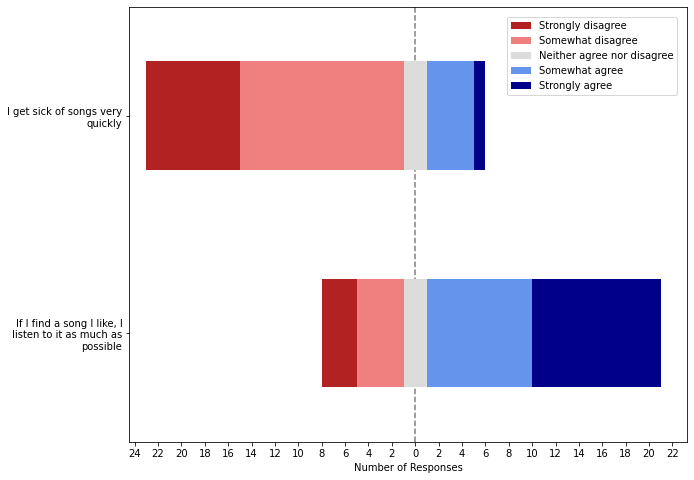

In [123]:
fig=plot_likert.plot_likert(likert, ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree'],plot_percentage=False,figsize=(10,8))
fig.legend(loc='best', ncol=1, borderaxespad=1)


In [187]:
likert['col1Score']=[likertDict[i] for i in likert.iloc[:,0]]

C:\Users\al33m\AppData\Local\Temp\ipykernel_688\1559815976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likert['col1Score']=[likertDict[i] for i in likert.iloc[:,0]]


In [189]:
likert['col2Score']=[inv_likertDict[i] for i in likert.iloc[:,1]]

In [190]:
likert

,I get sick of songs very quickly,"If I find a song I like, I listen to it as much as possible",col1Score,col2Score
0,Somewhat disagree,Strongly agree,2,1
1,Strongly disagree,Strongly agree,1,1
2,Somewhat disagree,Strongly agree,2,1
3,Strongly disagree,Strongly agree,1,1
4,Neither agree nor disagree,Somewhat agree,3,2
5,Strongly disagree,Somewhat disagree,1,4
6,Somewhat disagree,Somewhat agree,2,2
7,Strongly disagree,Strongly disagree,1,5
8,Somewhat disagree,Somewhat agree,2,2
9,Somewhat disagree,Somewhat agree,2,2


# boredom

In [138]:
BPS=newRaw_qs.iloc[:,16:43]

In [143]:
scoring=[False, 
         True, 
         True, 
         True, 
         True, 
         True, 
         False, 
         False, 
         True, 
         True,
         False, 
         True, 
         False, 
         True,
         False,
         True,
         True,
         False,
         True,
         True,
         True,
         False,
         False,
         False,
         True,
         True,
         True]

In [145]:
BPS.columns=BPS.loc[0]

In [146]:
BPS=BPS.drop([0])

In [150]:
BPS.reset_index(drop=True,inplace=True)

In [160]:
BPS.loc[0].values

array(['False', 'True', 'False', 'True', 'True', 'True', 'True', 'True',
       'True', 'True', 'False', 'True', 'False', 'True', 'True', 'False',
       'False', 'True', 'True', 'True', 'True', 'True', 'True', 'True',
       'False', 'False', 'True'], dtype=object)

In [334]:
len(BPS)

29

In [161]:
import ast

In [179]:
BPS['score']=BPS.apply(lambda x: np.sum(np.logical_and([ast.literal_eval(i) for i in x.values],scoring)),axis=1)

In [180]:
BPS

,Please answer a few questions regarding your personality and daily activities - It is easy for me to concentrate on my activities,Please answer a few questions regarding your personality and daily activities - Frequently when I am working I find myself worrying about other things,Please answer a few questions regarding your personality and daily activities - Time always seems to be passing slowly,Please answer a few questions regarding your personality and daily activities - I often find myself at 'lose ends' not knowing what to do,Please answer a few questions regarding your personality and daily activities - I am often trapped in situations where I have to do meaningless things,Please answer a few questions regarding your personality and daily activities - Having to look at someone's home movies or pictures bores me tremendously,"Please answer a few questions regarding your personality and daily activities - I have projects in mind all the time, things to do",Please answer a few questions regarding your personality and daily activities - I find it easy to entertain myself,Please answer a few questions regarding your personality and daily activities - Many things I have to do are repetitive and monotonous,Please answer a few questions regarding your personality and daily activities - It takes more stimulation to get me going than most people,...,Please answer a few questions regarding your personality and daily activities - It would be very hard for me to find a job that is exciting enough,Please answer a few questions regarding your personality and daily activities - I would like more challenging things to do in life,Please answer a few questions regarding your personality and daily activities - I feel that I am working below my abilities most of the time,Please answer a few questions regarding your personality and daily activities - Many people would say that I am a creative or imaginative person,"Please answer a few questions regarding your personality and daily activities - I have so many interests, I don't have time to do everything","Please answer a few questions regarding your personality and daily activities - Among my friends, I am the one who keeps doing something the longest","Please answer a few questions regarding your personality and daily activities - Unless I am doing something exciting, even dangerous, I feel half-dead and dull",Please answer a few questions regarding your personality and daily activities - It takes a lot of change and variety to keep me really happy,"Please answer a few questions regarding your personality and daily activities - It seems that the same things are on television or the radio all the time, it's getting old",score
0,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,True,12
1,False,True,False,False,True,True,False,True,True,True,...,False,False,True,True,True,False,False,False,False,10
2,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,4
3,True,False,False,False,False,False,True,True,True,False,...,False,False,False,True,True,True,False,False,False,1
4,False,True,False,True,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,7
5,True,False,False,False,True,True,False,True,True,False,...,False,True,False,False,False,False,False,False,True,8
6,False,True,False,False,False,False,True,True,True,False,...,False,False,True,True,True,False,False,False,False,5
7,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,4
8,True,True,False,True,False,False,True,False,True,False,...,True,False,False,True,True,False,True,True,False,7
9,True,True,False,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,True,8


In [193]:
BPS['get sick of songs']=likert['col1Score']
BPS['listen over and over']=likert['col2Score']

In [194]:
BPS

,Please answer a few questions regarding your personality and daily activities - It is easy for me to concentrate on my activities,Please answer a few questions regarding your personality and daily activities - Frequently when I am working I find myself worrying about other things,Please answer a few questions regarding your personality and daily activities - Time always seems to be passing slowly,Please answer a few questions regarding your personality and daily activities - I often find myself at 'lose ends' not knowing what to do,Please answer a few questions regarding your personality and daily activities - I am often trapped in situations where I have to do meaningless things,Please answer a few questions regarding your personality and daily activities - Having to look at someone's home movies or pictures bores me tremendously,"Please answer a few questions regarding your personality and daily activities - I have projects in mind all the time, things to do",Please answer a few questions regarding your personality and daily activities - I find it easy to entertain myself,Please answer a few questions regarding your personality and daily activities - Many things I have to do are repetitive and monotonous,Please answer a few questions regarding your personality and daily activities - It takes more stimulation to get me going than most people,...,Please answer a few questions regarding your personality and daily activities - I feel that I am working below my abilities most of the time,Please answer a few questions regarding your personality and daily activities - Many people would say that I am a creative or imaginative person,"Please answer a few questions regarding your personality and daily activities - I have so many interests, I don't have time to do everything","Please answer a few questions regarding your personality and daily activities - Among my friends, I am the one who keeps doing something the longest","Please answer a few questions regarding your personality and daily activities - Unless I am doing something exciting, even dangerous, I feel half-dead and dull",Please answer a few questions regarding your personality and daily activities - It takes a lot of change and variety to keep me really happy,"Please answer a few questions regarding your personality and daily activities - It seems that the same things are on television or the radio all the time, it's getting old",score,get sick of songs,listen over and over
0,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,12,2,1
1,False,True,False,False,True,True,False,True,True,True,...,True,True,True,False,False,False,False,10,1,1
2,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,4,2,1
3,True,False,False,False,False,False,True,True,True,False,...,False,True,True,True,False,False,False,1,1,1
4,False,True,False,True,False,True,False,False,False,False,...,False,True,False,True,False,False,True,7,3,2
5,True,False,False,False,True,True,False,True,True,False,...,False,False,False,False,False,False,True,8,1,4
6,False,True,False,False,False,False,True,True,True,False,...,True,True,True,False,False,False,False,5,2,2
7,True,False,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,4,1,5
8,True,True,False,True,False,False,True,False,True,False,...,False,True,True,False,True,True,False,7,2,2
9,True,True,False,True,False,False,False,False,False,False,...,True,False,True,False,False,True,True,8,2,2


In [203]:
BPS.iloc[:,-3:].corr()

,score,get sick of songs,listen over and over
0,,,
score,1.000000,0.053904,-0.184436
get sick of songs,0.053904,1.000000,0.551202
listen over and over,-0.184436,0.551202,1.000000


# Viz

## metrics

In [204]:
repeatSongDF

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,subnames,frequency,Popularity,Parent Genres
0,SOPHIE,HARD,HARD,64LJZpSz4VxvNDcyx1762M,0.779,0.728,5,-5.962,0,0.227,0.0854,0.108,0.552,83.986,174368,4,sub 0,3+ a week,42,Pop
1,Tessa Violet,Bad Ideas,Bad Ideas,41K8qlXVHE5cDv7eifdk4G,0.786,0.523,0,-7.583,0,0.21,0.000671,0.0978,0.379,80.042,179173,4,sub 0,3+ a week,53,Rock
2,SOPHIE,BIPP,BIPP,5HuOQHBDbb0UJjEE2fw6Uq,0.765,0.703,2,-3.883,1,0.166,0.0843,0.127,0.335,82.681,224143,5,sub 0,3+ a week,45,Pop
3,Frank Sinatra,Nothing But The Best (Remastered),That's Life - Remastered 2008,4dt6XKr0xKdPzjFhwB8dBm,0.392,0.632,4,-6.633,0,0.0529,0,0.457,0.556,114.917,187227,4,sub 2,Multiple Times a day,58,Easy listening
4,Badfinger,No Matter What You Are,Baby Blue,48cvvKFEwOyvSmeObYMVZa,0.566,0.493,11,-15.845,1,0.0309,0.000008,0.0624,0.608,125.011,221160,4,sub 2,Multiple Times a day,23,"Rock, Folk/Acoustic, Blues, Country"
5,The Beatles,Let It Be (Remastered),Across The Universe - Remastered 2009,4dkoqJrP0L8FXftrMZongF,0.257,0.412,1,-11.788,1,0.0287,0.000087,0.0702,0.858,152.126,228133,4,sub 2,Multiple Times a day,65,"Folk/Acoustic, Rock"
6,Giveon,Give Or Take,july 16th,41CJn3Q0pJwcNHbF8RM2QE,0.373,0.213,7,-13.034,1,0.0356,0.000002,0.524,0.403,79.44,110716,4,sub 3,Multiple Times a day,65,"Pop, R&B"
7,Justice,Woman,Stop,0WQbCSbujb6bSPVENrWYrl,0.525,0.634,1,-5.866,1,0.037,0.000106,0.113,0.661,170.065,297316,4,sub 3,Every Day,39,"Rock, Dance/Electronic"
8,Nas,Illmatic,N.Y. State of Mind,0trHOzAhNpGCsGBEu7dOJo,0.665,0.91,6,-4.682,0,0.223,0,0.227,0.887,84.099,293973,4,sub 3,Every Day,70,Hip Hop
9,Joe Henry,Civilians,Our Song,7cxyVmzrnEh4hXF9Zgz9pZ,0.552,0.282,7,-10.104,1,0.0291,0,0.114,0.268,103.068,379547,4,sub 4,3+ a week,32,Country


put songs together

In [242]:
repeatSongDF['tag']='loved'

In [243]:
sickSongsData['tag']='sick'

In [244]:
allSongs=pd.concat([repeatSongDF,sickSongsData],axis=0)

In [291]:
allSongs.reset_index(drop=True,inplace=True)

In [239]:
allSongs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,subnames,frequency,Popularity,Parent Genres,tag
0,SOPHIE,HARD,HARD,64LJZpSz4VxvNDcyx1762M,0.779,0.728,5,-5.962,0,0.227,...,0.108,0.552,83.986,174368,4,sub 0,3+ a week,42,Pop,repeat
1,Tessa Violet,Bad Ideas,Bad Ideas,41K8qlXVHE5cDv7eifdk4G,0.786,0.523,0,-7.583,0,0.21,...,0.0978,0.379,80.042,179173,4,sub 0,3+ a week,53,Rock,repeat
2,SOPHIE,BIPP,BIPP,5HuOQHBDbb0UJjEE2fw6Uq,0.765,0.703,2,-3.883,1,0.166,...,0.127,0.335,82.681,224143,5,sub 0,3+ a week,45,Pop,repeat
3,Frank Sinatra,Nothing But The Best (Remastered),That's Life - Remastered 2008,4dt6XKr0xKdPzjFhwB8dBm,0.392,0.632,4,-6.633,0,0.0529,...,0.457,0.556,114.917,187227,4,sub 2,Multiple Times a day,58,Easy listening,repeat
4,Badfinger,No Matter What You Are,Baby Blue,48cvvKFEwOyvSmeObYMVZa,0.566,0.493,11,-15.845,1,0.0309,...,0.0624,0.608,125.011,221160,4,sub 2,Multiple Times a day,23,"Rock, Folk/Acoustic, Blues, Country",repeat


Text(0.5, 1.0, 'Difference in Popularity')

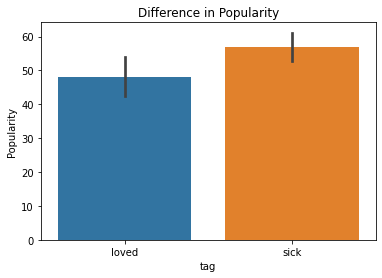

In [246]:
sns.barplot(y="Popularity", data=allSongs, x='tag')
plt.title('Difference in Popularity')

Text(0.5, 1.0, 'Difference in Song Duration')

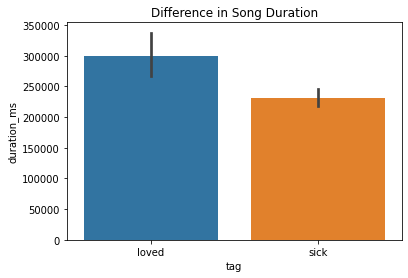

In [248]:
sns.barplot(y="duration_ms", data=allSongs, x='tag')
plt.title('Difference in Song Duration')

Text(0.5, 1.0, 'Difference in Song Duration')

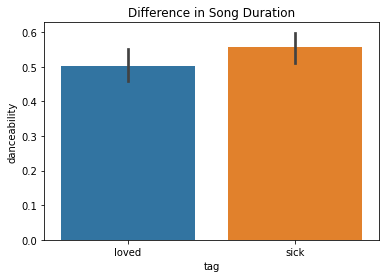

In [251]:
sns.barplot(y="danceability", data=allSongs, x='tag')
plt.title('Difference in Song Duration')

danceability


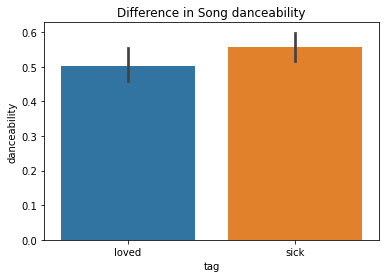

energy


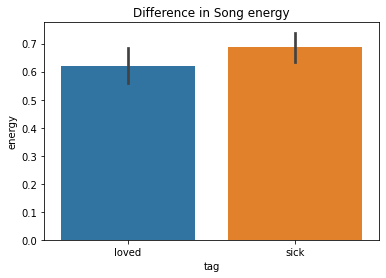

key


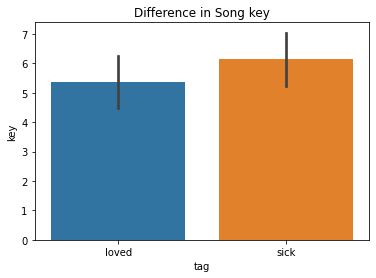

loudness


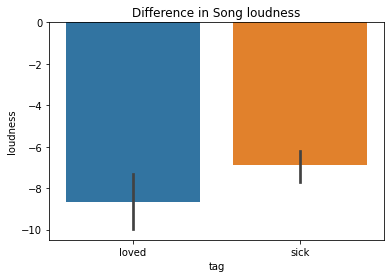

mode


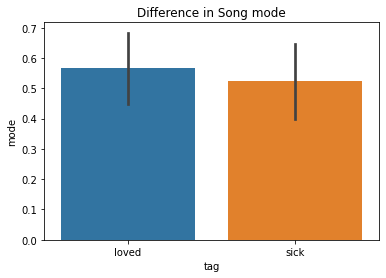

speechiness


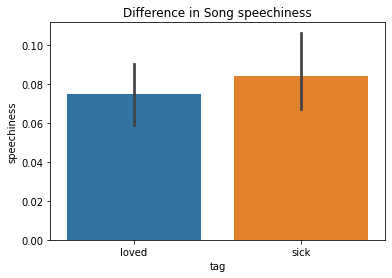

instrumentalness


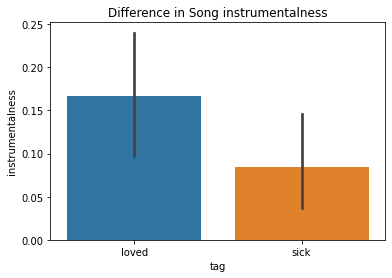

liveness


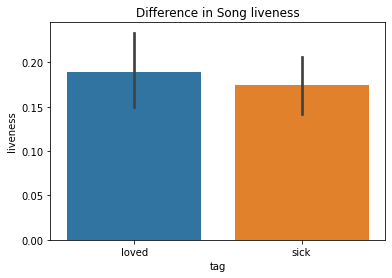

valence


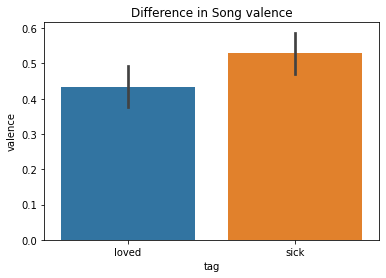

tempo


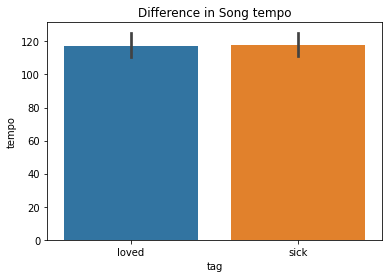

duration_ms


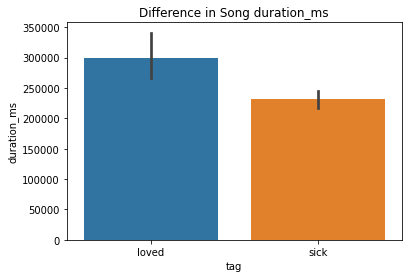

time_signature


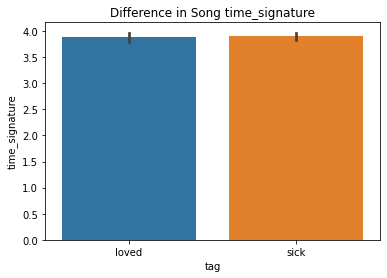

Popularity


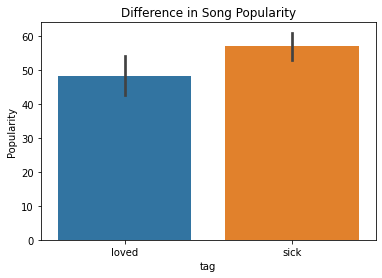

In [254]:
for i in ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature','Popularity']:
    print(i)
    sns.barplot(y=i, data=allSongs, x='tag')
    plt.title('Difference in Song '+i)
    plt.show()

## genres

['ffo']

In [265]:
'Rock, Folk/Acoustic, Blues, Country'.split(',')[0]

'Rock'

In [273]:
allSongs['Parent Genres']

0                                     Pop
1                                    Rock
2                                     Pop
3                          Easy listening
4     Rock, Folk/Acoustic, Blues, Country
                     ...                 
60                            Metal, Rock
61                       Metal, Rock, Pop
62                            Metal, Rock
63                            Metal, Rock
64                            Metal, Rock
Name: Parent Genres, Length: 125, dtype: object

In [278]:
allSongs.iloc[0:20]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,subnames,frequency,Popularity,Parent Genres,tag
0,SOPHIE,HARD,HARD,64LJZpSz4VxvNDcyx1762M,0.779,0.728,5,-5.962,0,0.227,...,0.108,0.552,83.986,174368,4,sub 0,3+ a week,42,Pop,loved
1,Tessa Violet,Bad Ideas,Bad Ideas,41K8qlXVHE5cDv7eifdk4G,0.786,0.523,0,-7.583,0,0.21,...,0.0978,0.379,80.042,179173,4,sub 0,3+ a week,53,Rock,loved
2,SOPHIE,BIPP,BIPP,5HuOQHBDbb0UJjEE2fw6Uq,0.765,0.703,2,-3.883,1,0.166,...,0.127,0.335,82.681,224143,5,sub 0,3+ a week,45,Pop,loved
3,Frank Sinatra,Nothing But The Best (Remastered),That's Life - Remastered 2008,4dt6XKr0xKdPzjFhwB8dBm,0.392,0.632,4,-6.633,0,0.0529,...,0.457,0.556,114.917,187227,4,sub 2,Multiple Times a day,58,Easy listening,loved
4,Badfinger,No Matter What You Are,Baby Blue,48cvvKFEwOyvSmeObYMVZa,0.566,0.493,11,-15.845,1,0.0309,...,0.0624,0.608,125.011,221160,4,sub 2,Multiple Times a day,23,"Rock, Folk/Acoustic, Blues, Country",loved
5,The Beatles,Let It Be (Remastered),Across The Universe - Remastered 2009,4dkoqJrP0L8FXftrMZongF,0.257,0.412,1,-11.788,1,0.0287,...,0.0702,0.858,152.126,228133,4,sub 2,Multiple Times a day,65,"Folk/Acoustic, Rock",loved
6,Giveon,Give Or Take,july 16th,41CJn3Q0pJwcNHbF8RM2QE,0.373,0.213,7,-13.034,1,0.0356,...,0.524,0.403,79.44,110716,4,sub 3,Multiple Times a day,65,"Pop, R&B",loved
7,Justice,Woman,Stop,0WQbCSbujb6bSPVENrWYrl,0.525,0.634,1,-5.866,1,0.037,...,0.113,0.661,170.065,297316,4,sub 3,Every Day,39,"Rock, Dance/Electronic",loved
8,Nas,Illmatic,N.Y. State of Mind,0trHOzAhNpGCsGBEu7dOJo,0.665,0.91,6,-4.682,0,0.223,...,0.227,0.887,84.099,293973,4,sub 3,Every Day,70,Hip Hop,loved
9,Joe Henry,Civilians,Our Song,7cxyVmzrnEh4hXF9Zgz9pZ,0.552,0.282,7,-10.104,1,0.0291,...,0.114,0.268,103.068,379547,4,sub 4,3+ a week,32,Country,loved


In [308]:
primaryGenre=[]

for i in allSongs['Parent Genres'].dropna():
    primaryGenre.append(i.split(',')[0])

In [312]:
genreDF=allSongs[['Parent Genres','tag']].dropna()

In [313]:
genreDF['primaryGenre']=primaryGenre

<AxesSubplot:xlabel='tag', ylabel='count'>

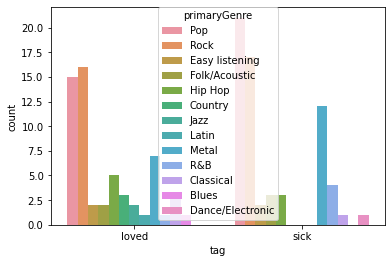

In [318]:
sns.countplot(x='tag',hue='primaryGenre',data=genreDF)

In [321]:
genreDF.groupby('tag')['primaryGenre'].value_counts()

tag    primaryGenre    
loved  Rock                16
       Pop                 15
       Metal                7
       Hip Hop              5
       Classical            3
       Country              3
       Easy listening       2
       Folk/Acoustic        2
       Jazz                 2
       Blues                1
       Latin                1
       R&B                  1
sick   Pop                 21
       Rock                17
       Metal               12
       R&B                  4
       Folk/Acoustic        3
       Hip Hop              3
       Easy listening       2
       Classical            1
       Dance/Electronic     1
Name: primaryGenre, dtype: int64

In [333]:
my_crosstab = pd.crosstab(index=genreDF["tag"], 
                            columns=genreDF["primaryGenre"])   # Include row and column totals
my_crosstab.T.sort_values(by='sick',ascending=False)

tag,loved,sick
primaryGenre,,
Pop,15,21
Rock,16,17
Metal,7,12
R&B,1,4
Folk/Acoustic,2,3
Hip Hop,5,3
Easy listening,2,2
Classical,3,1
Dance/Electronic,0,1
